# Lasso 회귀 모델

* Lasso 회귀는 선형 회귀 모델의 또 다른 규제된 버전
* `가중치 벡터의 절대값의 합인 $L_1$ Norm을 적용함`
* 덜 중요한 특징의 가중치(0)을 완전히 제거하려고 함
* 차수가 높은 다항 특징의 가중치를 0으로 만듦 -> 모델의 복잡도 낮아짐 -> 오버피팅 해소
  
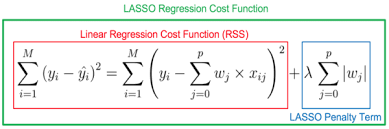


In [27]:
import pandas as pd
import numpy as np

# 레드와인 정보
redwine  = pd.read_csv('winequality-red.csv', sep=',', header=0) # header는 0번째 열에 있다.
redwine['type'] = 'red'

# 화이트와인 정보
whitewine  = pd.read_csv('winequality-white.csv', sep=';', header=0) # header는 0번째 열에 있다.
whitewine['type'] = 'white'

# 레드와인 + 화이트와인
wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(' ','_') # Coulmn명에 ' '공백이 있으면, data를 다루기 힘들기 때문에 '-'로 바꿔준다
wine.head()

X = wine.drop(['type', 'quality'], axis=1)
X.head()
y = wine.quality

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1946/2876785728.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine = redwine.append(whitewine)


In [28]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# hyper parameter 변경에 의해 실제로 계수가 어떻게 0이 되는지 확인

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1946/1915801884.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation=90)


Text(0.5, 1.0, 'Lasso : alpha 0.05, rmse = 0.761')

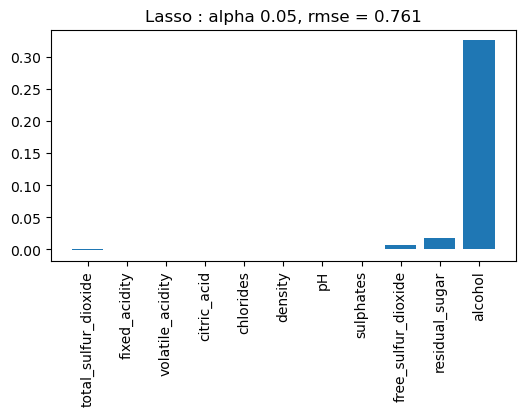

In [29]:
# alpha = 0.05
alpha = 0.05
model_name = 'Lasso'
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
coef = pd.Series(data=lasso.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation=90)
ax.set_title("{0} : alpha {1}, rmse = {2}" .format(model_name, alpha, rmse))

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1946/1591550628.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation=90)


Text(0.5, 1.0, 'Lasso : alpha 2.0, rmse = 0.857')

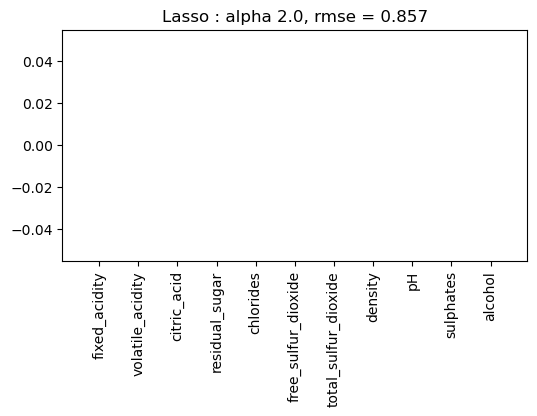

In [30]:
# alpha = 2.0
alpha = 2.0
model_name = 'Lasso'
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
coef = pd.Series(data=lasso.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation=90)
ax.set_title("{0} : alpha {1}, rmse = {2}" .format(model_name, alpha, rmse))